# Explore unicity distance for GTDB rs207

[Unicity distance](https://en.wikipedia.org/wiki/Unicity_distance) for genomes; tentatively defined as "How many sourmash hashes does it take to classify a genome uniquely?"

In [1]:
import csv

def read_unicity_file(filename):
    d = {}
    with open(filename, newline="") as fp:
        r = csv.reader(fp)
        for n, row in enumerate(r):
            #if n > 100000: break
            ident = row[0]
            unicity_trace = list(map(int, row[2:]))
            d[ident] = unicity_trace
    return d

In [2]:
UNICITY_CSV = 'gtdb-rs207.genomic.k31.unicity.csv'
d = read_unicity_file(UNICITY_CSV)

In [3]:
n_unique = 0
n_infinite = 0
for k, v in d.items():
    if v[-1] != 1:
        n_infinite += 1
        #print(len(v), v[-3:])
    if len(v) == 1:
        n_unique += 1

print(f"Looked at {len(d)} genomes total, in '{UNICITY_CSV}'")
print(f"{n_unique / len(d) * 100:.01f}% of genomes have unicity distance of 1; {n_infinite * 100 / len(d):.01f}% have an infinite unicity distance")
print(n_unique)
print(n_infinite)

Looked at 317542 genomes total, in 'gtdb-rs207.genomic.k31.unicity.csv'
15.3% of genomes have unicity distance of 1; 29.2% have an infinite unicity distance
48630
92564


In [4]:
z = []
z2 = []
for k, v in d.items():
    z.append(len(v))
    is_infinite = bool(v[-1] != 1)
    z2.append(dict(ident=k, unicity=len(v), is_infinite=is_infinite))

In [5]:
import pandas as pd
df = pd.DataFrame(z2)
df

,ident,unicity,is_infinite
0,GCF_000814905.1,1,False
1,GCA_007116955.1,3,False
2,GCF_017948435.1,27,False
3,GCA_017995835.1,1,False
4,GCF_001981135.1,361,False
...,...,...,...
317537,GCA_019115945.1,147,True
317538,GCF_003849745.1,6,False
317539,GCA_903892235.1,124,False
317540,GCF_002317655.1,535,True


In [6]:
df.describe()

,unicity
count,317542.000000
mean,144.710756
std,187.921327
min,1.000000
25%,5.000000
50%,34.000000
75%,253.000000
max,1249.000000


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt


(array([125272., 149168., 163007., 172187., 179200., 184341., 189071.,
        192891., 196983., 200048., 202932., 205245., 207880., 211399.,
        216009., 220079., 223381., 227064., 232956., 237557., 241939.,
        248931., 252746., 255208., 257411., 259311., 260965., 262240.,
        263261., 265159., 266372., 268436., 272870., 278585., 280298.,
        281864., 284129., 287909., 291337., 295497., 298197., 300508.,
        302283., 304441., 306892., 309244., 310125., 310932., 311495.,
        312038., 312775., 313361., 313845., 314157., 314573., 315121.,
        315654., 316141., 316397., 316574., 316721., 316804., 316915.,
        317004., 317091., 317175., 317212., 317270., 317315., 317350.,
        317381., 317411., 317431., 317455., 317472., 317489., 317493.,
        317502., 317508., 317509., 317510., 317517., 317523., 317525.,
        317527., 317527., 317528., 317533., 317536., 317538., 317538.,
        317538., 317538., 317540., 317540., 317540., 317541., 317541.,
      

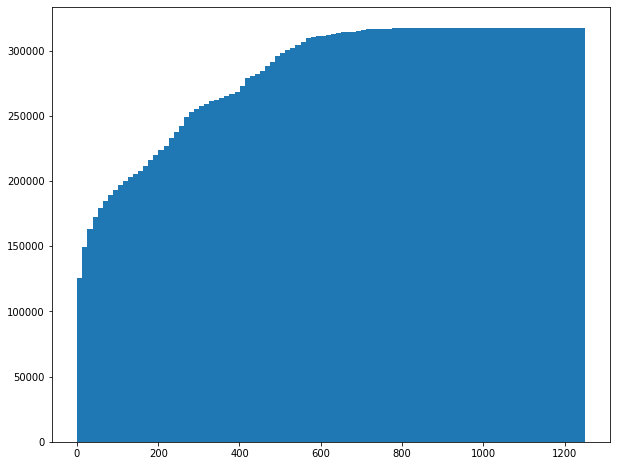

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.hist(z, cumulative=True, bins=100)

## Taxonomy

In [9]:
from sourmash.tax.tax_utils import MultiLineageDB, get_ident
tax_db = MultiLineageDB.load(['../sourmash/gtdb-rs207.taxonomy.sqldb'])

def get_genus(ident):
    ident = get_ident(ident) # trim
    lintup = tax_db[ident]
    while lintup[-1].rank != 'genus':
        lintup = lintup[:-1]
        
    assert lintup
    return lintup[-1].name

def get_species(ident):
    ident = get_ident(ident) # trim
    lintup = tax_db[ident]
    while lintup[-1].rank != 'species':
        lintup = lintup[:-1]
        
    assert lintup
    return lintup[-1].name

In [11]:
df['genus'] = df['ident'].apply(get_genus)
df['species'] = df['ident'].apply(get_species)

In [12]:
inf_df = df[df['is_infinite']]

In [13]:
print(inf_df['species'].value_counts()[:20].to_markdown())

|                               |   species |
|:------------------------------|----------:|
| s__Staphylococcus aureus      |      8367 |
| s__Salmonella enterica        |      7602 |
| s__Escherichia coli           |      6324 |
| s__Streptococcus pneumoniae   |      5513 |
| s__Mycobacterium tuberculosis |      5485 |
| s__Klebsiella pneumoniae      |      4428 |
| s__Acinetobacter baumannii    |      2519 |
| s__Pseudomonas aeruginosa     |      1873 |
| s__Streptococcus pyogenes     |      1399 |
| s__Listeria monocytogenes     |      1207 |
| s__Mycobacterium abscessus    |      1139 |
| s__Listeria monocytogenes_B   |      1097 |
| s__Clostridioides difficile   |       958 |
| s__Burkholderia mallei        |       937 |
| s__Neisseria meningitidis     |       893 |
| s__Streptococcus suis         |       890 |
| s__Wolbachia pipientis        |       869 |
| s__Pseudomonas_E viridiflava  |       855 |
| s__Vibrio cholerae            |       854 |
| s__Enterococcus_B faecium     | 

In [16]:
print(inf_df['species'].value_counts()[-20:].to_markdown())

|                                   |   species |
|:----------------------------------|----------:|
| s__JAHJIW01 sp018823125           |         1 |
| s__Ardenticatena maritima         |         1 |
| s__Pseudomonas_D salina           |         1 |
| s__Arthrobacter_E woluwensis      |         1 |
| s__Longimicrobium terrae          |         1 |
| s__Corynebacterium pilosum        |         1 |
| s__Dickeya chrysanthemi           |         1 |
| s__Marinirhabdus sp002375495      |         1 |
| s__Echinicola rosea               |         1 |
| s__TMED25 sp016780665             |         1 |
| s__XYB1-FULL-32-11 sp903854535    |         1 |
| s__UBA2277 sp903886255            |         1 |
| s__Flavobacterium sp004634195     |         1 |
| s__Chlorobium phaeoclathratiforme |         1 |
| s__Salinicoccus roseus            |         1 |
| s__Cedecea neteri                 |         1 |
| s__Microbacterium paraoxydans     |         1 |
| s__Streptococcus himalayensis     |         1 |


In [14]:
print(inf_df['genus'].value_counts()[:20].to_markdown())

|                    |   genus |
|:-------------------|--------:|
| g__Streptococcus   |    9682 |
| g__Staphylococcus  |    9476 |
| g__Salmonella      |    7700 |
| g__Mycobacterium   |    6875 |
| g__Escherichia     |    6383 |
| g__Klebsiella      |    5032 |
| g__Acinetobacter   |    2772 |
| g__Listeria        |    2456 |
| g__Pseudomonas     |    1900 |
| g__Pseudomonas_E   |    1875 |
| g__Vibrio          |    1794 |
| g__Burkholderia    |    1654 |
| g__Neisseria       |    1397 |
| g__Campylobacter_D |    1389 |
| g__Enterococcus_B  |    1178 |
| g__Clostridioides  |     960 |
| g__Bordetella      |     938 |
| g__Francisella     |     906 |
| g__Wolbachia       |     905 |
| g__Enterococcus    |     787 |


In [15]:
print(inf_df['genus'].value_counts()[-20:].to_markdown())

|                     |   genus |
|:--------------------|--------:|
| g__2-01-FULL-38-13  |       1 |
| g__UBA6175          |       1 |
| g__Bisgaardia       |       1 |
| g__SR-FBR-E99       |       1 |
| g__Longimicrobium   |       1 |
| g__1-14-0-20-42-23  |       1 |
| g__WRGU01           |       1 |
| g__Halogeometricum  |       1 |
| g__XYB1-FULL-32-11  |       1 |
| g__Arthrobacter_E   |       1 |
| g__JAHJIW01         |       1 |
| g__2-02-FULL-40-12  |       1 |
| g__Fischerella      |       1 |
| g__WO2-46-25        |       1 |
| g__Wagnerdoeblera   |       1 |
| g__UBA2361          |       1 |
| g__Ornithobacterium |       1 |
| g__UBA4765          |       1 |
| g__Anoxybacillus_A  |       1 |
| g__Borkfalkia       |       1 |


In [19]:
staph_df = inf_df[inf_df['species'] == 's__Staphylococcus aureus']
print(len(staph_df))

with open('staph_inf.csv', 'w', newline="") as fp:
    w = csv.writer(fp)
    w.writerow(['ident'])
    for ident in staph_df.ident:
        w.writerow([ident])

staph_df

8367


,ident,unicity,is_infinite,genus,species
170,GCF_003423725.1,248,True,g__Staphylococcus,s__Staphylococcus aureus
176,GCF_900017645.1,264,True,g__Staphylococcus,s__Staphylococcus aureus
199,GCF_000564935.1,260,True,g__Staphylococcus,s__Staphylococcus aureus
203,GCF_900038455.1,264,True,g__Staphylococcus,s__Staphylococcus aureus
222,GCF_000546145.1,272,True,g__Staphylococcus,s__Staphylococcus aureus
...,...,...,...,...,...
317422,GCF_000162695.1,252,True,g__Staphylococcus,s__Staphylococcus aureus
317424,GCF_000570875.1,271,True,g__Staphylococcus,s__Staphylococcus aureus
317430,GCF_000573525.1,271,True,g__Staphylococcus,s__Staphylococcus aureus
317466,GCF_001196435.1,271,True,g__Staphylococcus,s__Staphylococcus aureus


In [21]:
bork_df = inf_df[inf_df['species'] == 's__Borkfalkia excrementavium']
print(len(bork_df))

with open('bork_inf.csv', 'w', newline="") as fp:
    w = csv.writer(fp)
    w.writerow(['ident'])
    for ident in bork_df.ident:
        w.writerow([ident])

bork_df

1


,ident,unicity,is_infinite,genus,species
317537,GCA_019115945.1,147,True,g__Borkfalkia,s__Borkfalkia excrementavium
